In [30]:
# Importando las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline



# Cargando el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

df.head()

,location,indicator,subject,measure,frequency,time,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,-
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.81
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.28
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.24
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.54


In [40]:
print(df)
print(df.info)
print(df.describe)
print(df.columns)

      location    indicator subject     measure frequency  time    value 
0          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1990      -   
1          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1991    27.81 
2          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1992    26.28 
3          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1993    26.24 
4          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1994    25.54 
...        ...          ...     ...         ...       ...   ...       ...
12135     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2024   732.15 
12136     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2025   737.01 
12137     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2026   741.10 
12138     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2027   743.49 
12139     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2028   747.01 

[12140 rows x 7 columns]
<bound method DataFrame.info of       location    indicator subject     measure freque

HAY VALORE QUE SON NaN QUE NO HEMOS PODIDO CONVERTIR A NÚMERO POR LO QUE PROCEDEMOS A LA ALIMINACIÓN DE LA FILAS QUE TIENEN ESTOS CALORES NULOS

In [42]:
# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Verificar si hay valores NaN después de la conversión y contarlos
nan_count = df['value'].isna().sum()
print(f"Valores NaN en 'value': {nan_count}")

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Verificar nuevamente el dataset
print(df_cleaned.info())


Valores NaN en 'value': 2365
<class 'pandas.core.frame.DataFrame'>
Index: 9775 entries, 1 to 12139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   9775 non-null   object 
 1   indicator  9775 non-null   object 
 2   subject    9775 non-null   object 
 3   measure    9775 non-null   object 
 4   frequency  9775 non-null   object 
 5   time       9775 non-null   int64  
 6   value      9775 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 610.9+ KB
None


Análisis exploratorio de datos

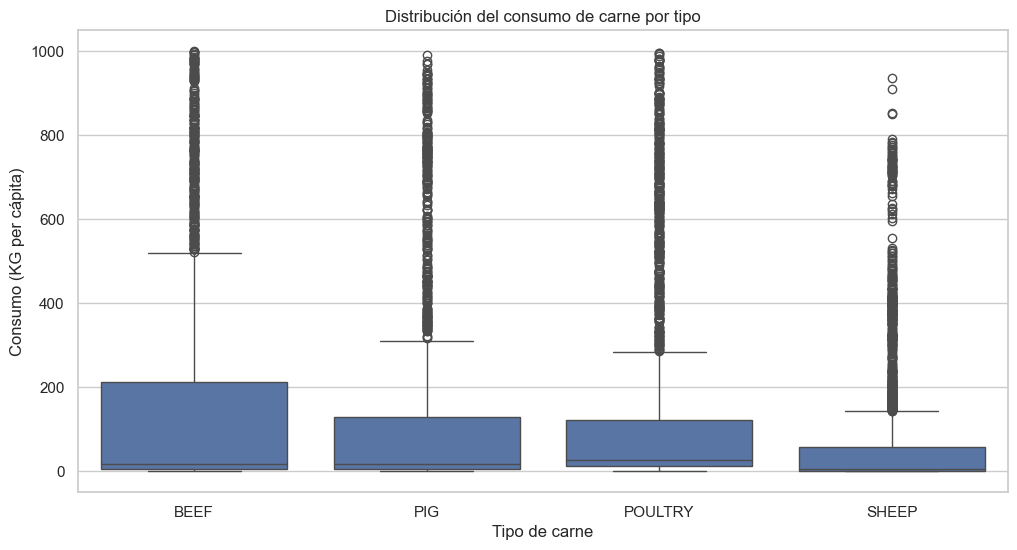

In [43]:
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Distribución de consumo de carne por tipo
plt.figure(figsize=(12, 6))
sns.boxplot(x='subject', y='value', data=df_cleaned)
plt.title('Distribución del consumo de carne por tipo')
plt.xlabel('Tipo de carne')
plt.ylabel('Consumo (KG per cápita)')
plt.show()


EXPLICACIÓN: 

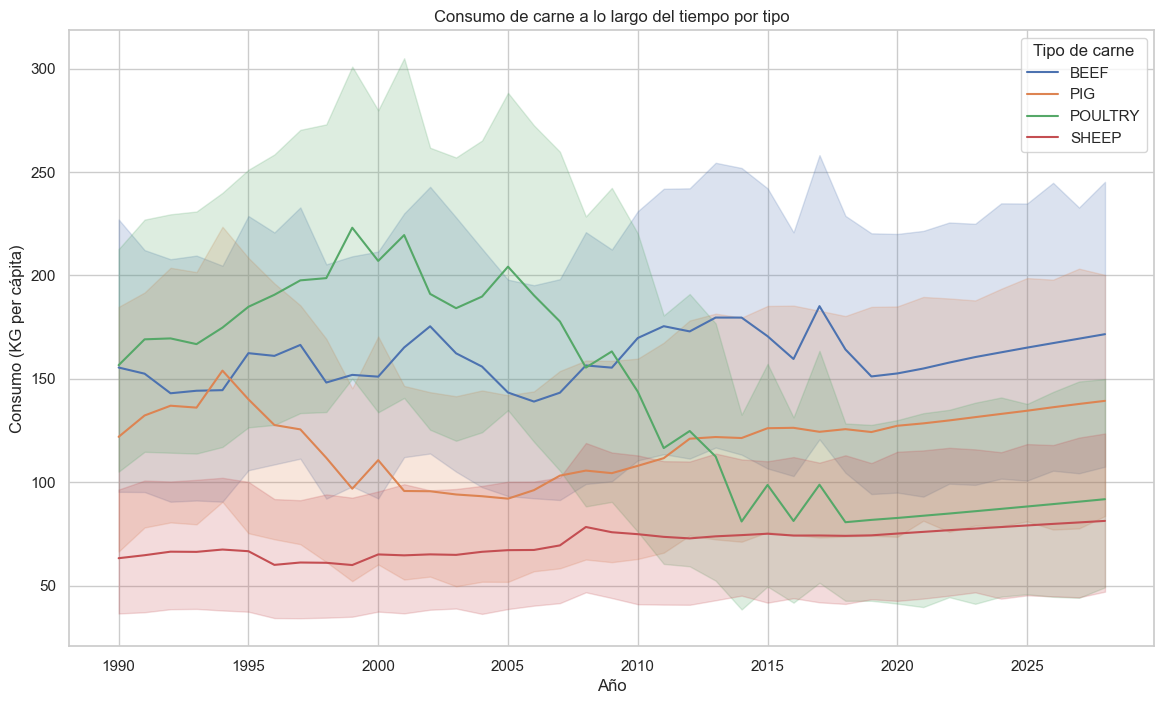

In [44]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='time', y='value', hue='subject', data=df_cleaned)
plt.title('Consumo de carne a lo largo del tiempo por tipo')
plt.xlabel('Año')
plt.ylabel('Consumo (KG per cápita)')
plt.legend(title='Tipo de carne')
plt.show()


EXPLICACIÓN: 

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\1929010285.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value', y='location', data=consumo_por_pais_sorted, palette='tab20')


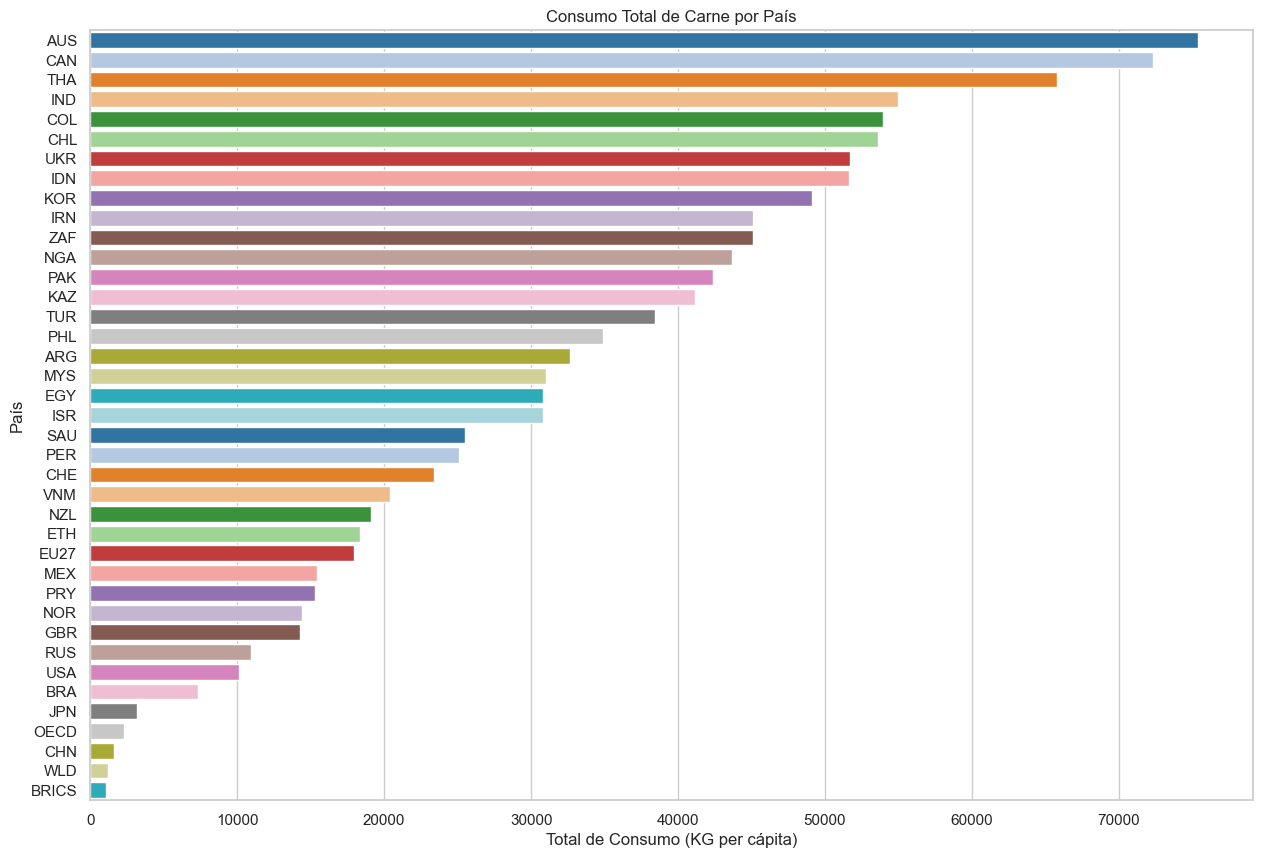

In [45]:
# Agrupar y sumar el consumo por ubicación (país)
consumo_por_pais = df_cleaned.groupby('location')['value'].sum().reset_index()

# Ordenar los países por consumo para una mejor visualización
consumo_por_pais_sorted = consumo_por_pais.sort_values('value', ascending=False)


# Visualización
plt.figure(figsize=(15, 10))
sns.barplot(x='value', y='location', data=consumo_por_pais_sorted, palette='tab20')

plt.title('Consumo Total de Carne por País')
plt.xlabel('Total de Consumo (KG per cápita)')
plt.ylabel('País')
plt.show()


EXPLICACIÓN: 

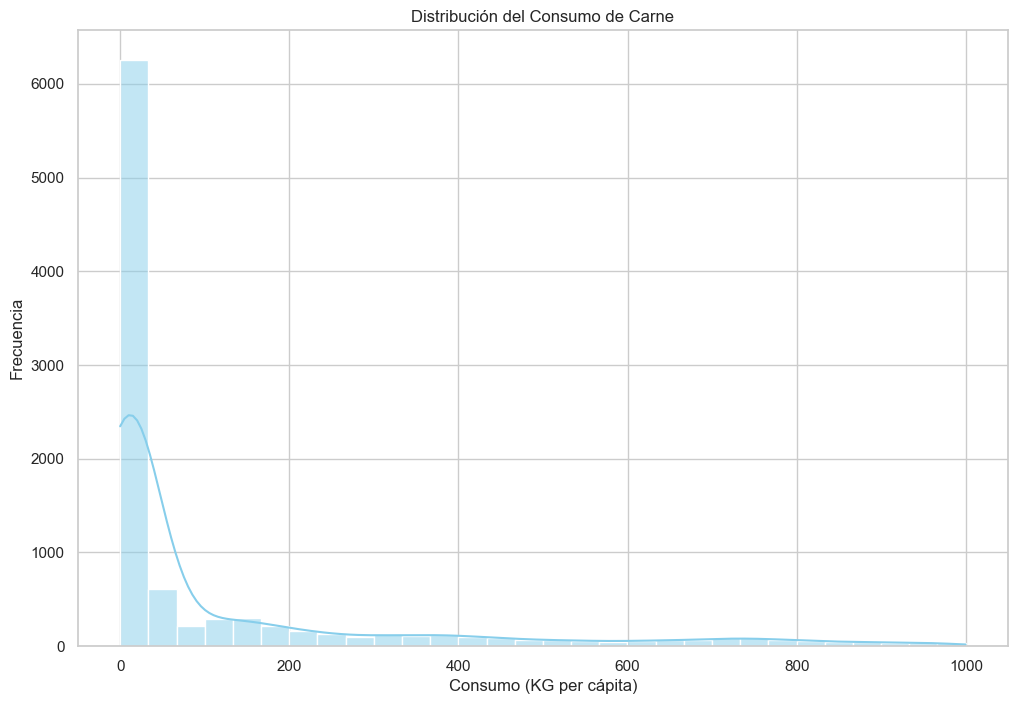

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para visualizar la distribución del consumo de carne
plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['value'], kde=True, bins=30, color='skyblue')

plt.title('Distribución del Consumo de Carne')
plt.xlabel('Consumo (KG per cápita)')
plt.ylabel('Frecuencia')
plt.show()


EXPLICACIÓN: 

EMPEZAMOS CON EL ANALISIS DESCRIPTIVO

ANÁLISIS POR TIPO DE CARNE

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Análisis estadístico descriptivo por tipo de carne
descriptive_stats = df_cleaned.groupby('subject')['value'].describe()

# Mostrar las estadísticas descriptivas
print(descriptive_stats)


          count        mean         std   min      25%     50%       75%  \
subject                                                                    
BEEF     2410.0  160.249133  250.331688  0.35   6.4825  17.725  212.0425   
PIG      2339.0  119.833514  217.270159  0.00   5.2050  16.830  129.6900   
POULTRY  2201.0  147.195111  249.281109  0.11  11.7600  27.110  121.2300   
SHEEP    2825.0   71.095696  145.155083  0.01   1.0900   5.090   58.2000   

            max  
subject          
BEEF     999.69  
PIG      990.67  
POULTRY  996.22  
SHEEP    937.13  


EXPLICACIÓN: 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

# Cargando el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Análisis estadístico descriptivo por tipo de carne
descriptive_stats = df_cleaned.groupby('subject')['value'].describe()

# Mostrar las estadísticas descriptivas
print(descriptive_stats)



          count        mean         std   min      25%     50%       75%  \
subject                                                                    
BEEF     2410.0  160.249133  250.331688  0.35   6.4825  17.725  212.0425   
PIG      2339.0  119.833514  217.270159  0.00   5.2050  16.830  129.6900   
POULTRY  2201.0  147.195111  249.281109  0.11  11.7600  27.110  121.2300   
SHEEP    2825.0   71.095696  145.155083  0.01   1.0900   5.090   58.2000   

            max  
subject          
BEEF     999.69  
PIG      990.67  
POULTRY  996.22  
SHEEP    937.13  


EXPLICACIÓN: 

HACEMOS ANALISIS DE CORRELACIÓN DE LAS VARIABLES

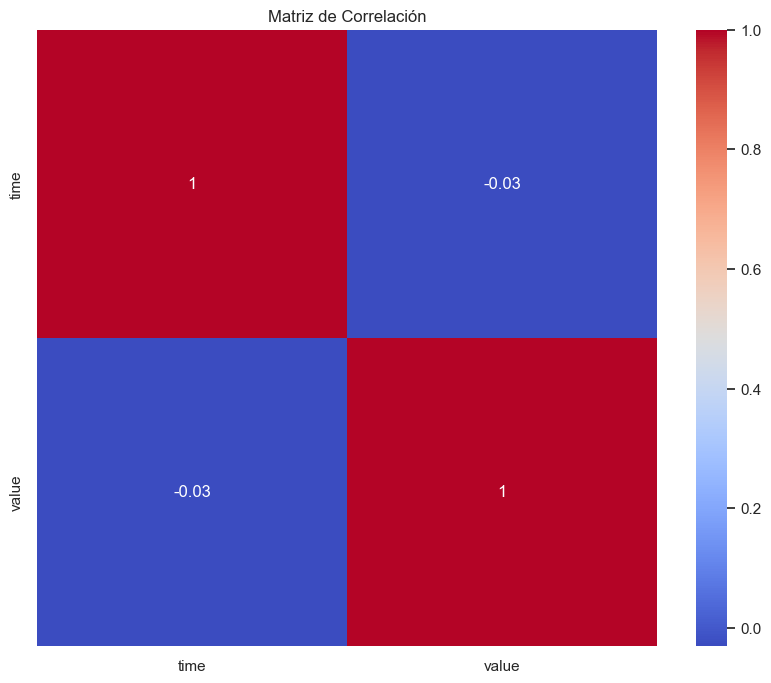

In [54]:
# Seleccionar solo las columnas numéricas
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


EXPLICACIÓN: 

Explicación de la Matriz de Correlación

Correlación: La correlación mide la fuerza y la dirección de una relación lineal entre dos variables. Los valores de correlación están entre -1 y 1.

o   1 indica una correlación positiva perfecta.
o  -1 indica una correlación negativa perfecta.
o   0 indica que no hay correlación lineal entre las variables.


Interpretación de la MatrizDiagonal Principal:
La correlación de una variable consigo misma siempre es 1, lo cual es representado por la diagonal principal (de color rojo intenso).
Por ejemplo, time con time y value con value son iguales a 1.

Off-Diagonal:
La correlación entre time y value es -0.03, lo que indica que hay una correlación negativa muy débil entre el tiempo y el consumo de carne. En otras palabras, no hay una relación lineal fuerte entre el año y el consumo de carne reportado en tu dataset.
La correlación entre value y time también es -0.03 por la simetría de la matriz de correlación.

ANALISIS PREDICTIVO

REGRESIÓN LINEAL GENERAL

General Mean Squared Error: 50804.551453913766
General R^2 Score: 0.0003159684871318902


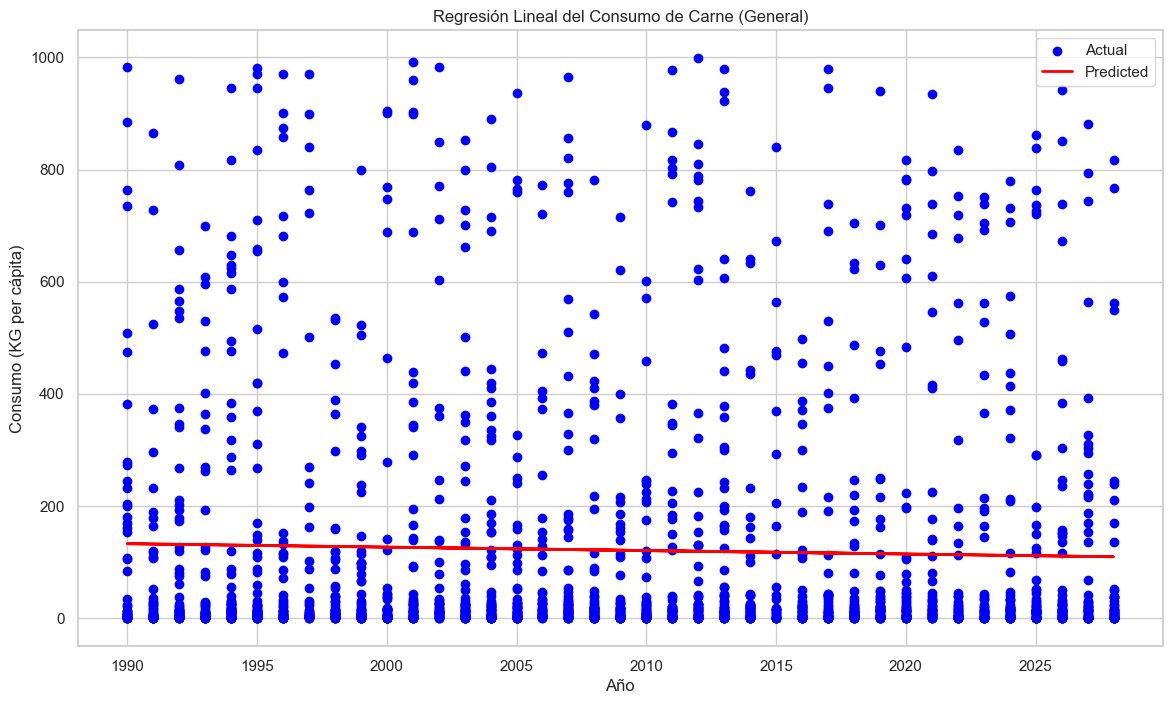

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos para la regresión lineal general
X_general = df_cleaned[['time']]
y_general = df_cleaned['value']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_general, y_general, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model_gen = LinearRegression()

# Entrenar el modelo
model_gen.fit(X_train_gen, y_train_gen)

# Hacer predicciones
y_pred_gen = model_gen.predict(X_test_gen)

# Evaluar el modelo
mse_gen = mean_squared_error(y_test_gen, y_pred_gen)
r2_gen = r2_score(y_test_gen, y_pred_gen)
print(f"General Mean Squared Error: {mse_gen}")
print(f"General R^2 Score: {r2_gen}")

# Visualización de resultados
plt.figure(figsize=(14, 8))
plt.scatter(X_test_gen, y_test_gen, color='blue', label='Actual')
plt.plot(X_test_gen, y_pred_gen, color='red', linewidth=2, label='Predicted')
plt.title('Regresión Lineal del Consumo de Carne (General)')
plt.xlabel('Año')
plt.ylabel('Consumo (KG per cápita)')
plt.legend()
plt.show()



REGRESIÓN LINEAL POR TIPO DE CARNE

BEEF Mean Squared Error: 58400.51254311008
BEEF R^2 Score: -0.00446232165008853
PIG Mean Squared Error: 47586.98563682588
PIG R^2 Score: -0.0008557165772102859
POULTRY Mean Squared Error: 59999.93484205576
POULTRY R^2 Score: 0.04180063477442386
SHEEP Mean Squared Error: 20103.59767452699
SHEEP R^2 Score: 0.00033881132594215657


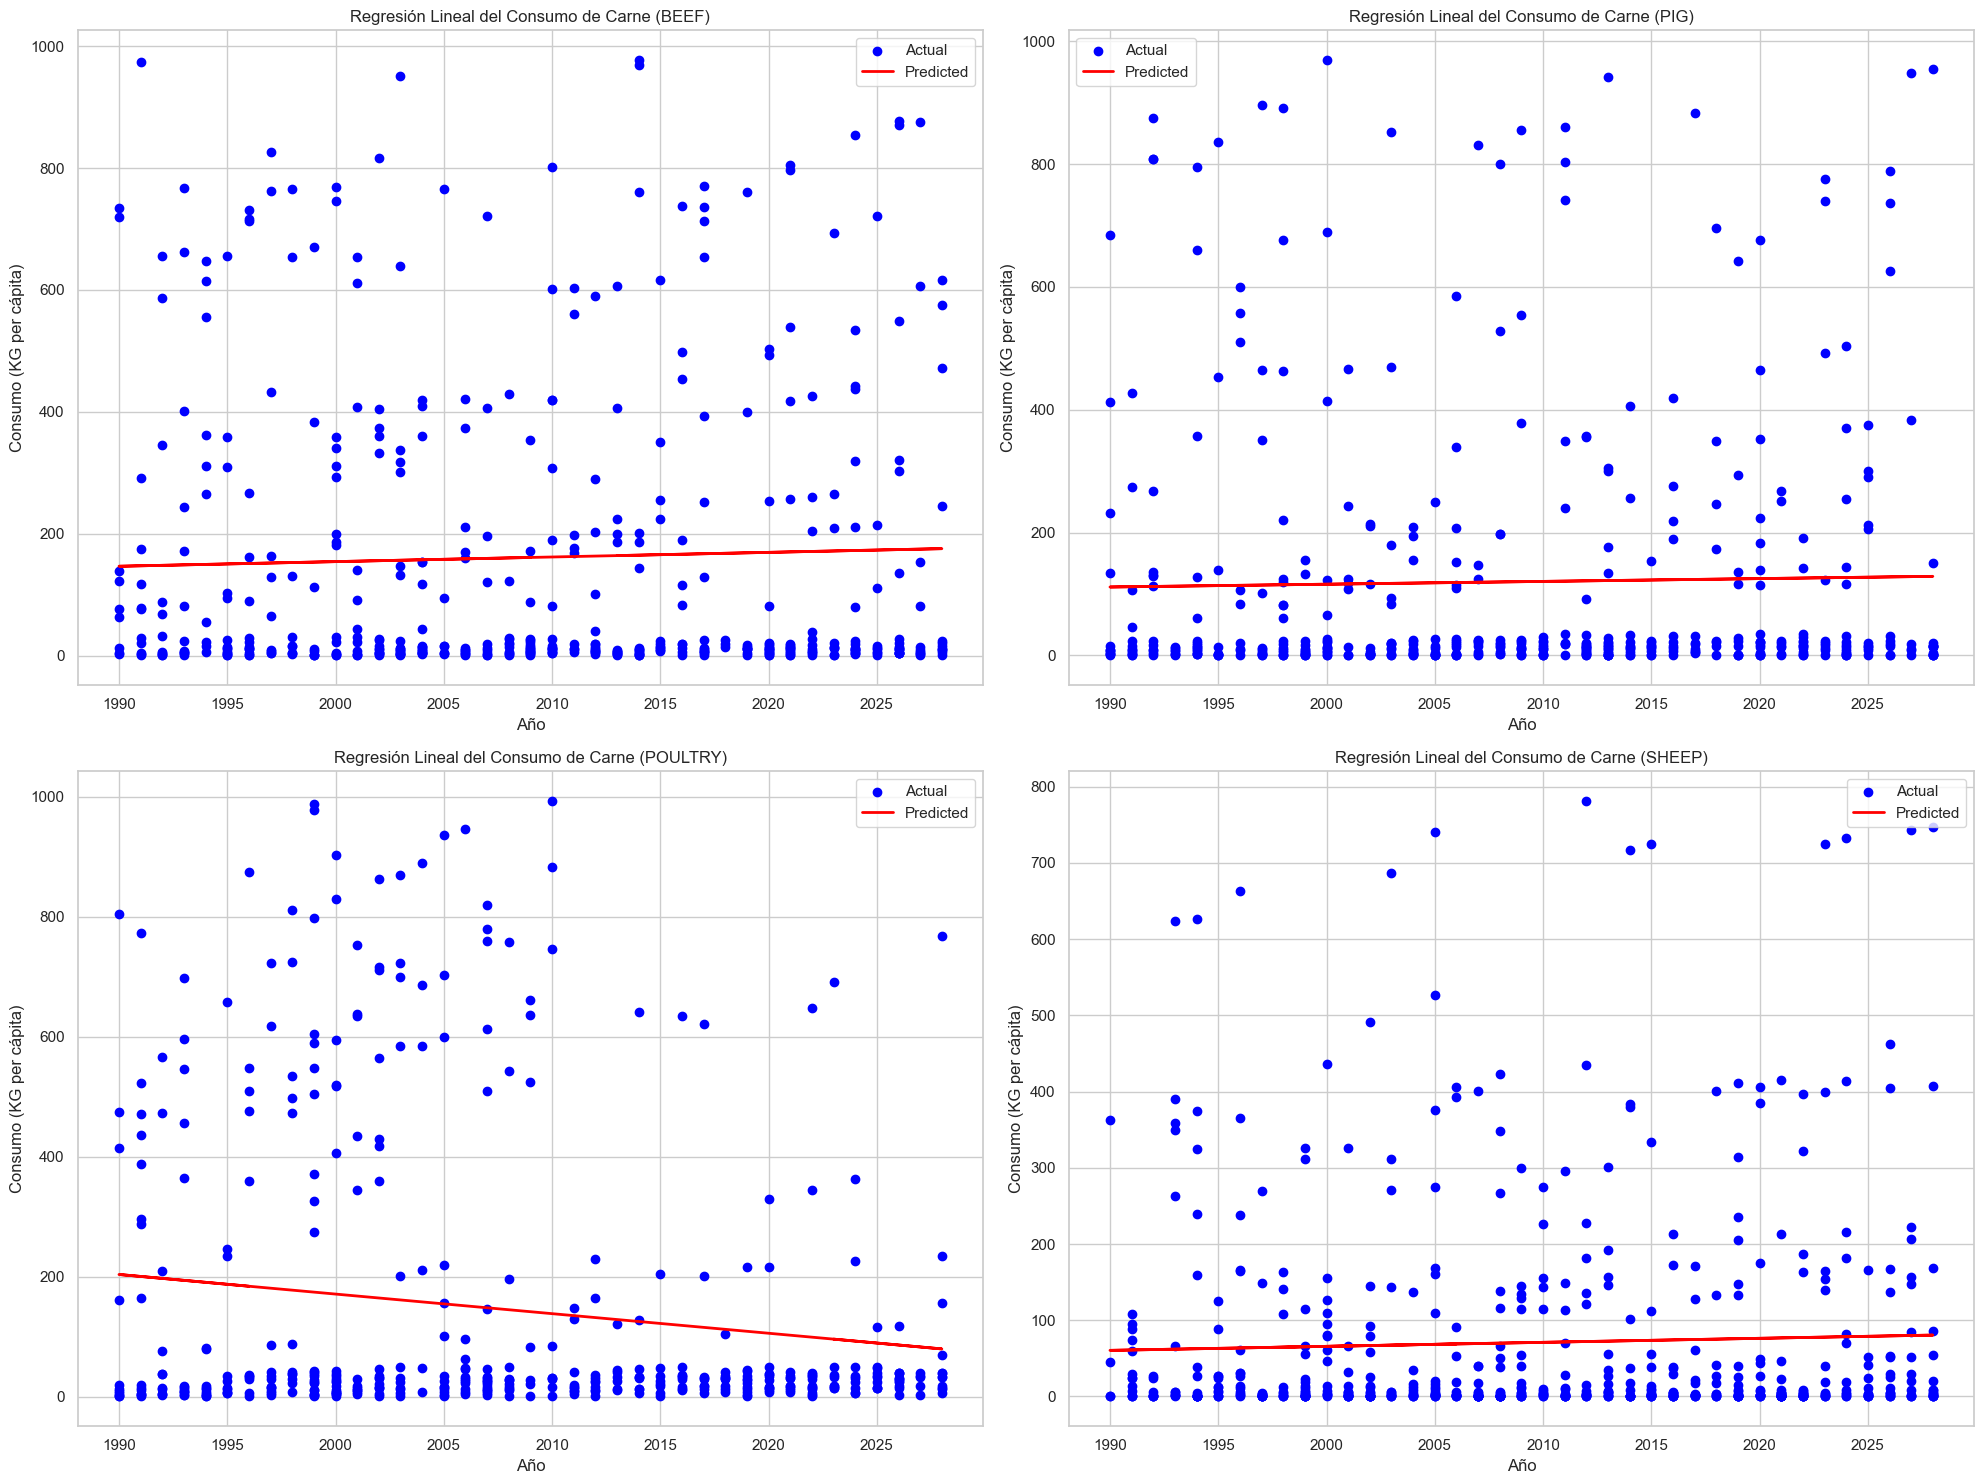

In [57]:
# Tipos de carne
meat_types = df_cleaned['subject'].unique()

# Crear una figura para los gráficos
plt.figure(figsize=(20, 15))

# Iterar sobre cada tipo de carne y ajustar un modelo de regresión lineal
for i, meat in enumerate(meat_types):
    plt.subplot(2, 2, i+1)  # Crear un subplot para cada tipo de carne
    
    # Filtrar los datos por tipo de carne
    df_meat = df_cleaned[df_cleaned['subject'] == meat]
    X_meat = df_meat[['time']]
    y_meat = df_meat['value']
    
    # Dividir el dataset en conjuntos de entrenamiento y prueba
    X_train_meat, X_test_meat, y_train_meat, y_test_meat = train_test_split(X_meat, y_meat, test_size=0.2, random_state=42)
    
    # Crear el modelo de regresión lineal
    model_meat = LinearRegression()
    
    # Entrenar el modelo
    model_meat.fit(X_train_meat, y_train_meat)
    
    # Hacer predicciones
    y_pred_meat = model_meat.predict(X_test_meat)
    
    # Evaluar el modelo
    mse_meat = mean_squared_error(y_test_meat, y_pred_meat)
    r2_meat = r2_score(y_test_meat, y_pred_meat)
    print(f"{meat} Mean Squared Error: {mse_meat}")
    print(f"{meat} R^2 Score: {r2_meat}")
    
    # Visualización de resultados
    plt.scatter(X_test_meat, y_test_meat, color='blue', label='Actual')
    plt.plot(X_test_meat, y_pred_meat, color='red', linewidth=2, label='Predicted')
    plt.title(f'Regresión Lineal del Consumo de Carne ({meat})')
    plt.xlabel('Año')
    plt.ylabel('Consumo (KG per cápita)')
    plt.legend()

plt.tight_layout()
plt.show()


PCA

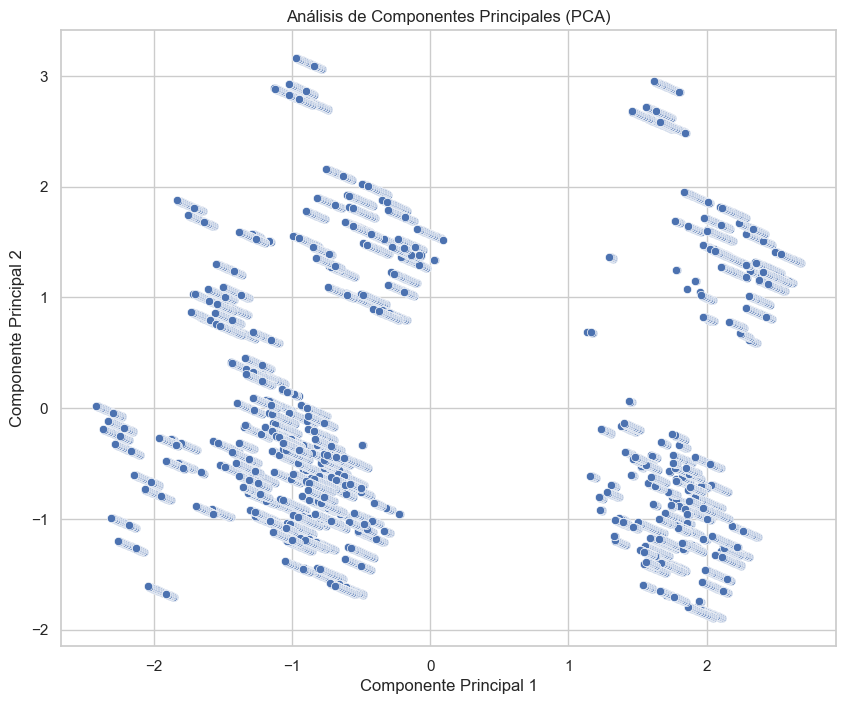

In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

# Cargar el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Separar las características numéricas y categóricas
numeric_cols = ['time']
categorical_cols = ['location', 'indicator', 'subject', 'measure', 'frequency']

# Codificar las variables categóricas usando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_cleaned[categorical_cols])

# Crear un DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Combinar las características codificadas con las características numéricas
df_combined = pd.concat([encoded_df, df_cleaned[numeric_cols]], axis=1)

# Estandarizar los datos
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_combined)

# Convertir a DataFrame para manejar NaNs
df_standardized = pd.DataFrame(df_standardized, columns=df_combined.columns)

# Verificar y eliminar cualquier valor NaN restante
df_standardized = df_standardized.dropna()

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_standardized)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualización de los componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


EXPLICACIÓN:


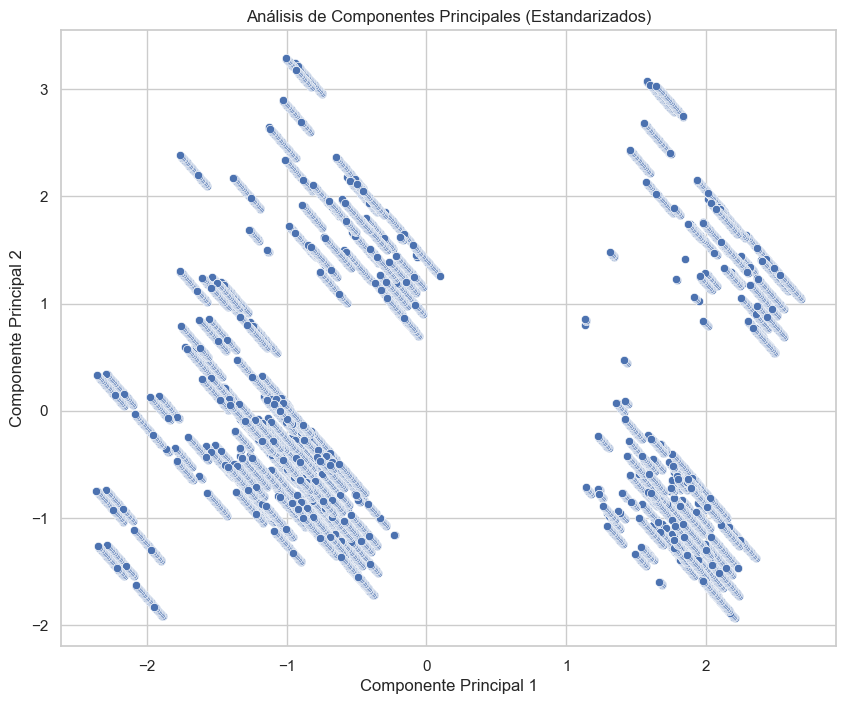

Varianza explicada por cada componente: [0.04583922 0.0309671 ]
Varianza explicada acumulada: [0.04583922 0.07680632]


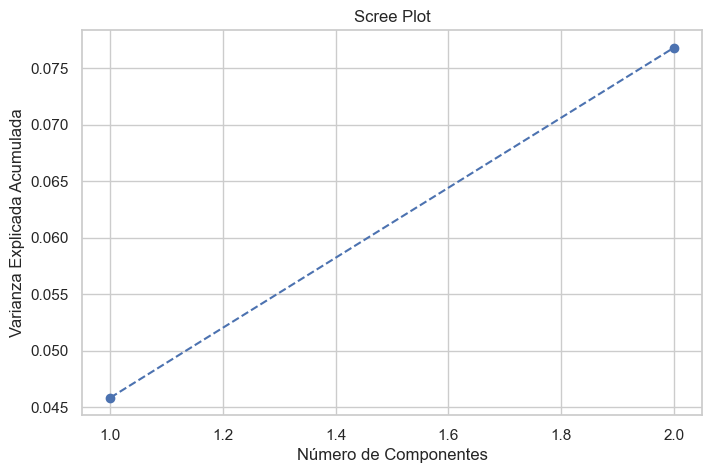

Cargas de las variables originales en cada componente principal: [[-0.02849078  0.0068379  -0.05591979 -0.14346469 -0.0179139   0.09338277
   0.06916574 -0.14144976  0.07135583 -0.02063137  0.056903   -0.07625646
  -0.03609827  0.01389314 -0.00305812  0.02107704  0.05172407 -0.07043012
   0.04152907  0.00814996 -0.04320067 -0.06047215  0.04589115  0.08418687
   0.01726318 -0.09349299  0.06599775  0.06371975  0.00428541  0.02652845
  -0.04932385 -0.03582781  0.06238433  0.02962264 -0.03215755 -0.05441833
  -0.01152905 -0.14370248  0.05485226 -0.         -0.0776342   0.01129669
  -0.10265974  0.15777847 -0.63309721  0.63309721 -0.         -0.0572144 ]
 [ 0.04792313 -0.0471921   0.16480036  0.06421614 -0.02313612 -0.0259939
  -0.05571698 -0.101252   -0.09329128 -0.07310317  0.00751173 -0.00967637
   0.02575291  0.05389138  0.08813023  0.06117    -0.07504577  0.1222426
  -0.06185227  0.06379753  0.20250861 -0.006141   -0.11313632 -0.02549307
  -0.02336842  0.04716097 -0.0250822  -0.1264486

In [68]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

# Cargar el dataset desde el archivo CSV
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")

# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Separar las características numéricas y categóricas
numeric_cols = ['time']
categorical_cols = ['location', 'indicator', 'subject', 'measure', 'frequency']

# Codificar las variables categóricas usando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_cleaned[categorical_cols])

# Crear un DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Combinar las características codificadas con las características numéricas
df_combined = pd.concat([encoded_df, df_cleaned[numeric_cols]], axis=1)

# Estandarizar los datos
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_combined)

# Convertir a DataFrame para manejar NaNs
df_standardized = pd.DataFrame(df_standardized, columns=df_combined.columns)

# Verificar y eliminar cualquier valor NaN restante
df_standardized = df_standardized.dropna()

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_standardized)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualización de los componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Análisis de Componentes Principales (Estandarizados)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Varianza Explicada
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)
print("Varianza explicada acumulada:", explained_variance.cumsum())

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

# Cargas de las variables originales en cada componente principal
loadings = pca.components_
print("Cargas de las variables originales en cada componente principal:", loadings)


CLUSTERING Y K-MEANS

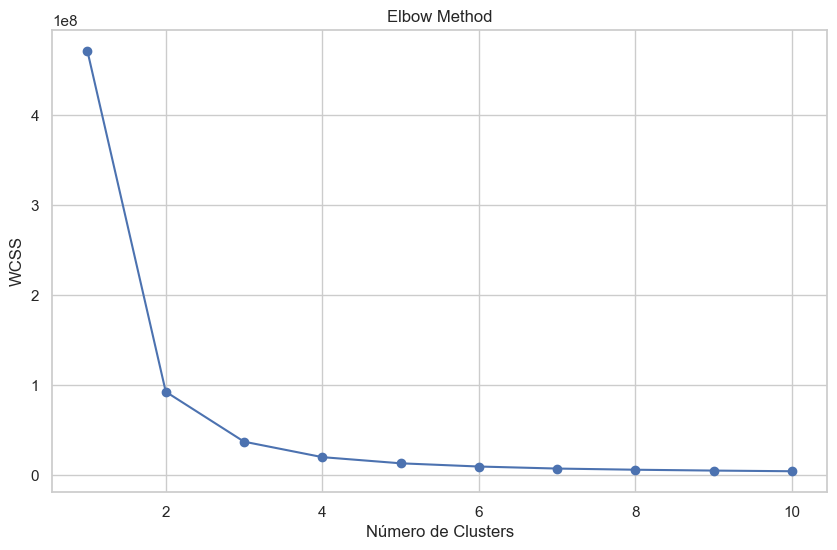

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular el Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca[['PC1', 'PC2']])
    wcss.append(kmeans.inertia_)

# Visualizar el Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


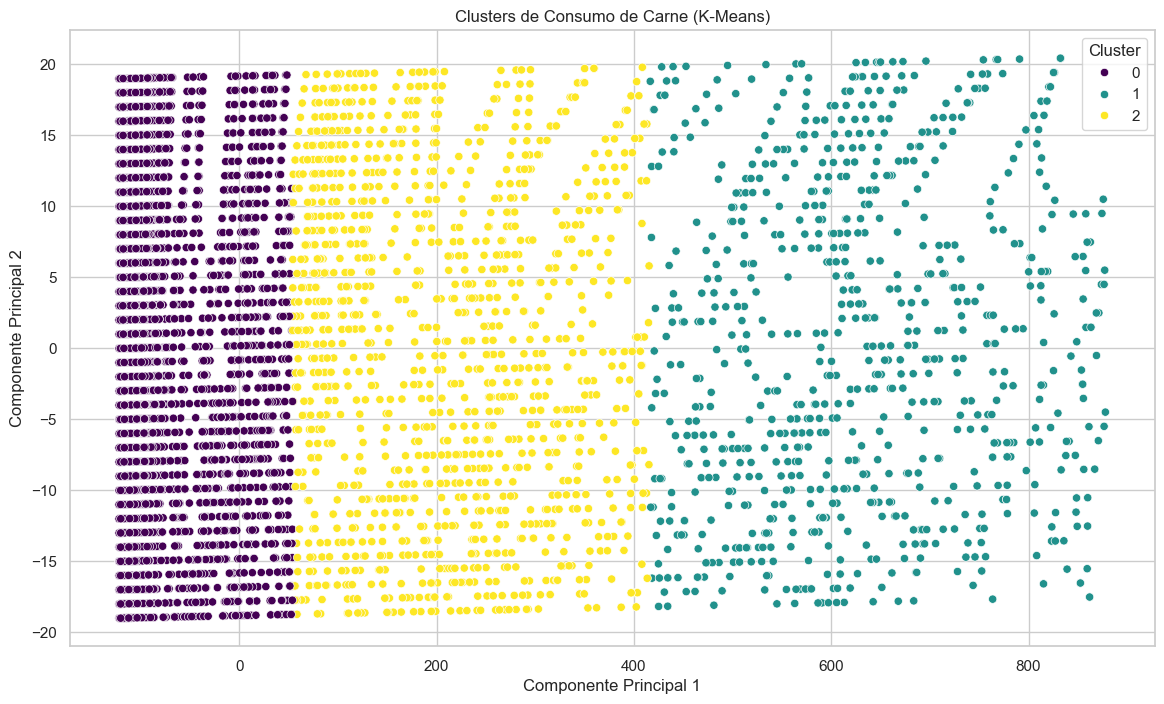

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

# Cargar y limpiar el dataset
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")
df.columns = df.columns.str.strip()
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df_cleaned = df.dropna(subset=['value'])

# Seleccionar solo las columnas numéricas para PCA
numeric_cols = ['time', 'value']
df_numeric = df_cleaned[numeric_cols]

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['subject'] = df_cleaned['subject']
df_pca['location'] = df_cleaned['location']

# Aplicar K-Means con 3 clusters (puedes ajustar el número de clusters según sea necesario)
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

# Visualizar los clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters de Consumo de Carne (K-Means)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()



In [80]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_pca[['PC1', 'PC2']])
silhouette_avg = silhouette_score(df_pca[['PC1', 'PC2']], labels)
print(f"Silhouette Score para 3 clusters: {silhouette_avg}")


Silhouette Score para 3 clusters: 0.7875429244991137


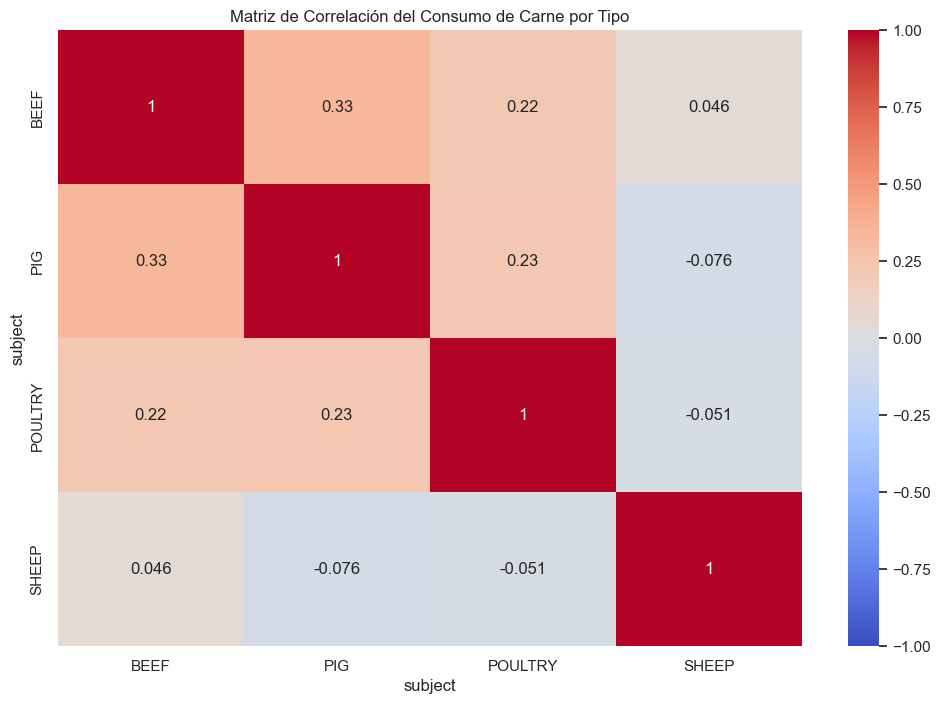

In [78]:
# Crear una tabla pivote con el consumo de carne por tipo y por país/año
pivot_table = df_cleaned.pivot_table(values='value', index=['location', 'time'], columns='subject', aggfunc='mean')

# Calcular la matriz de correlación
correlation_matrix = pivot_table.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación del Consumo de Carne por Tipo')
plt.show()


C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\2240274432.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=df_pca[df_pca['subject'] == meat_type], hue='location', palette='Set2', alpha=0.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


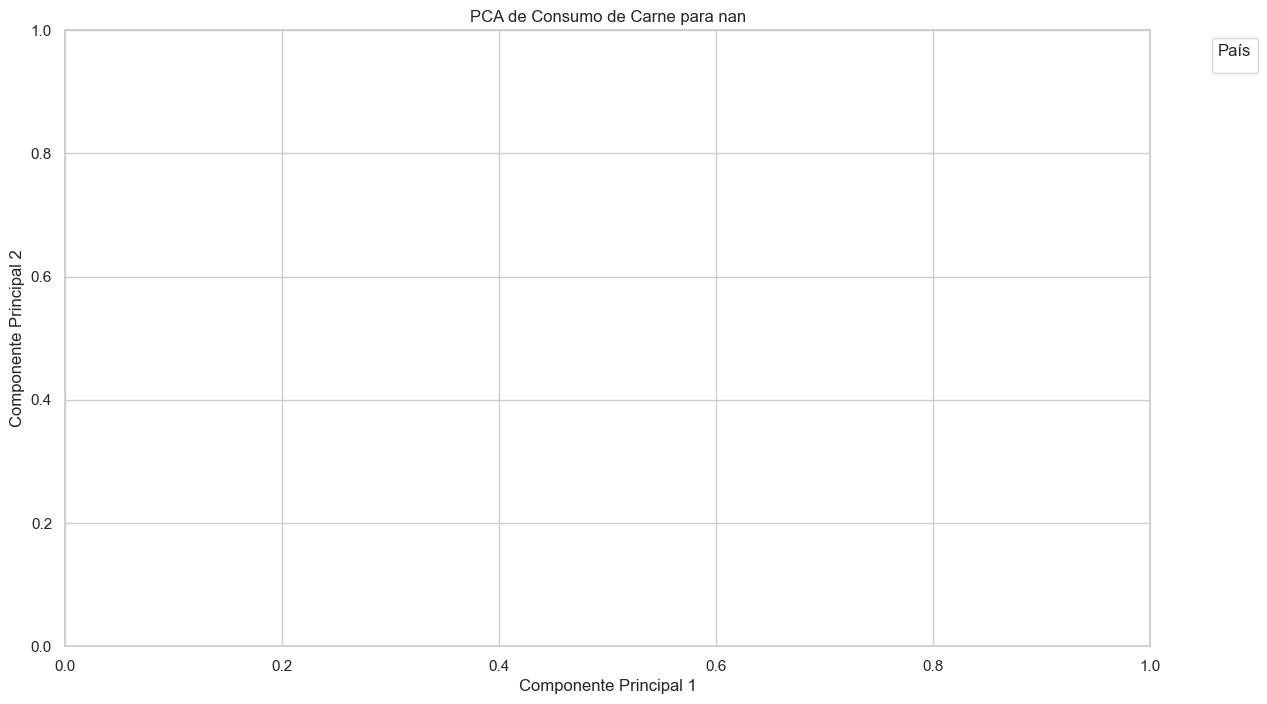

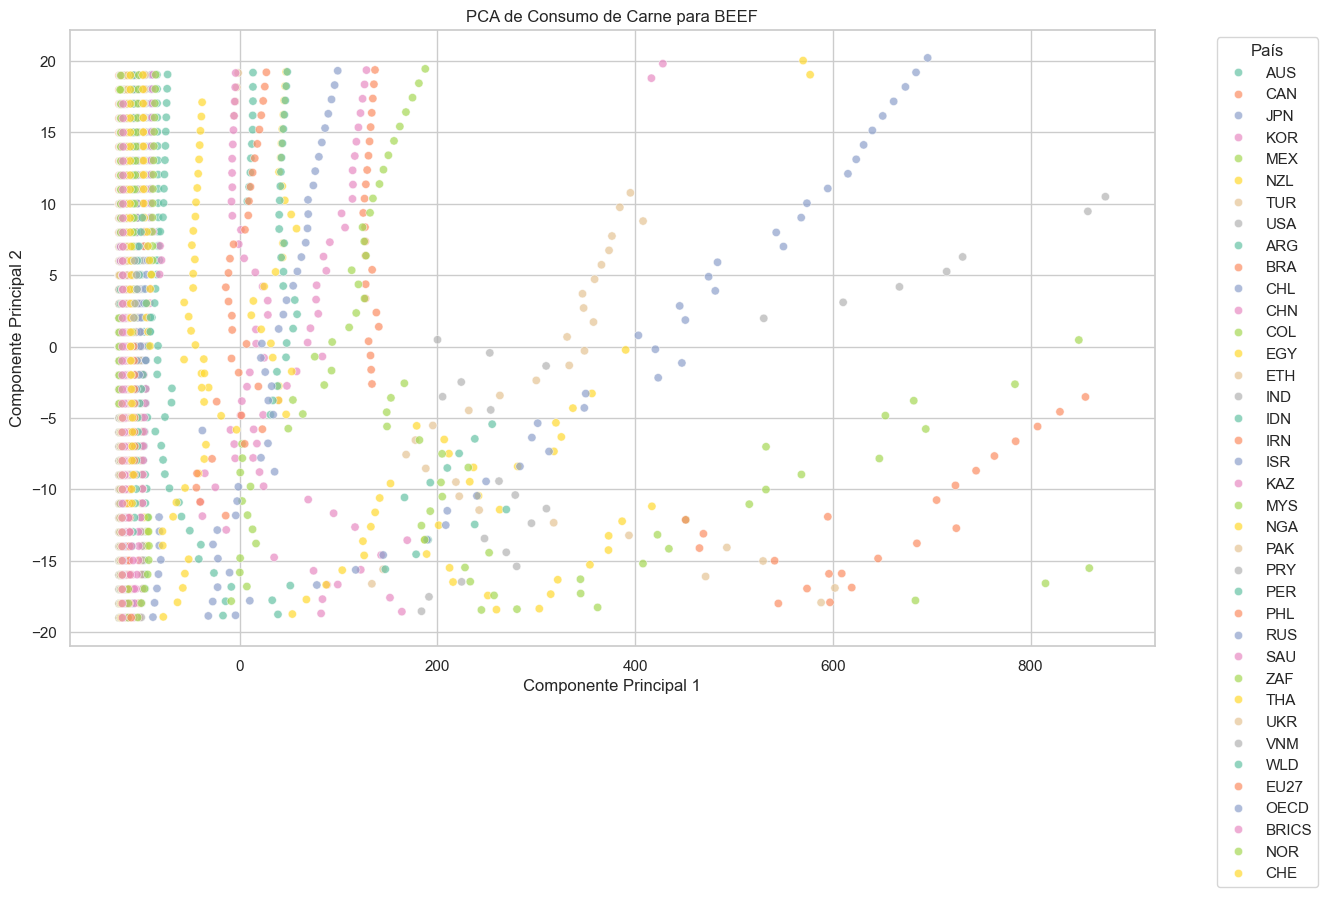

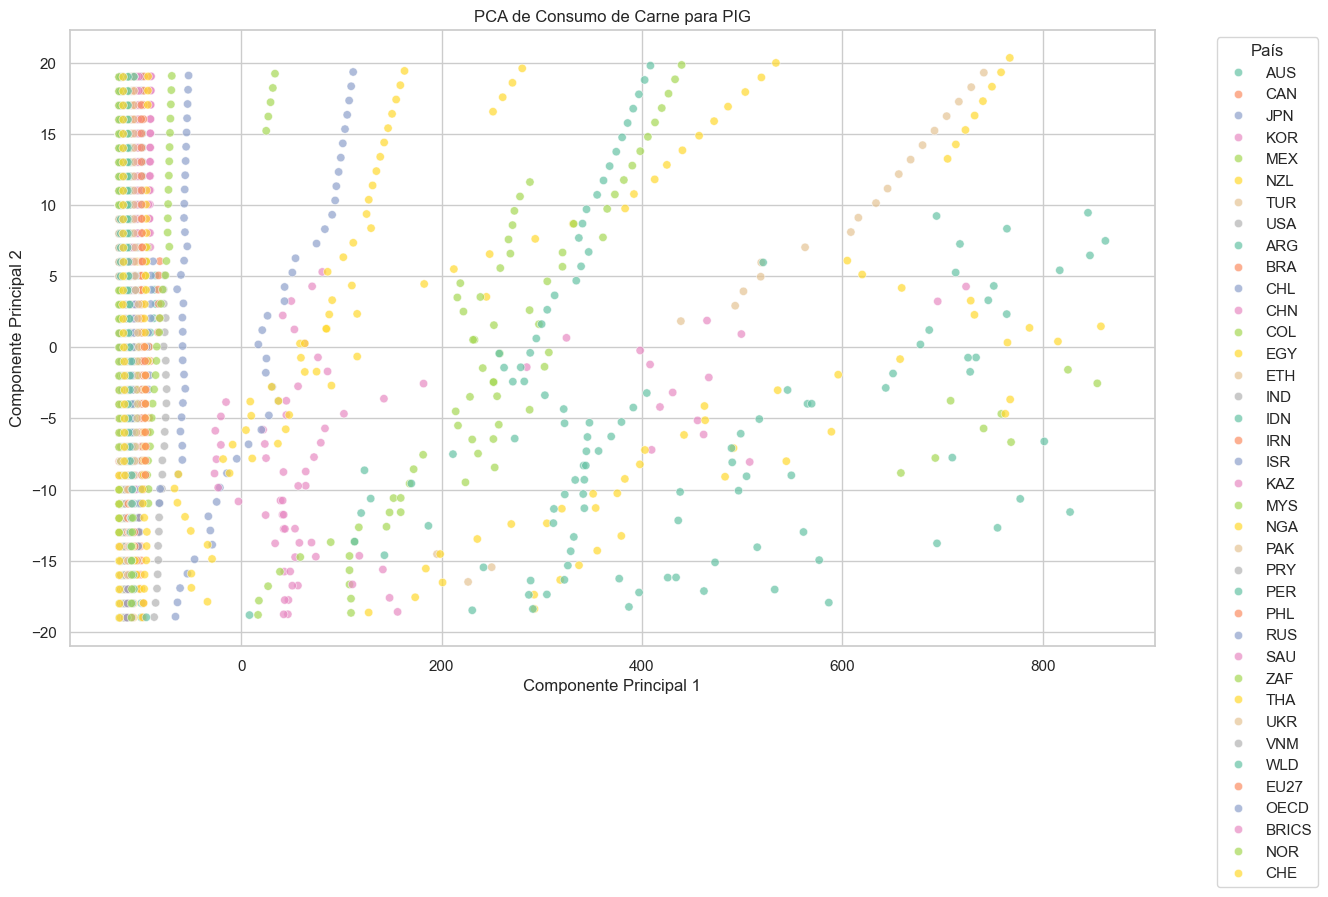

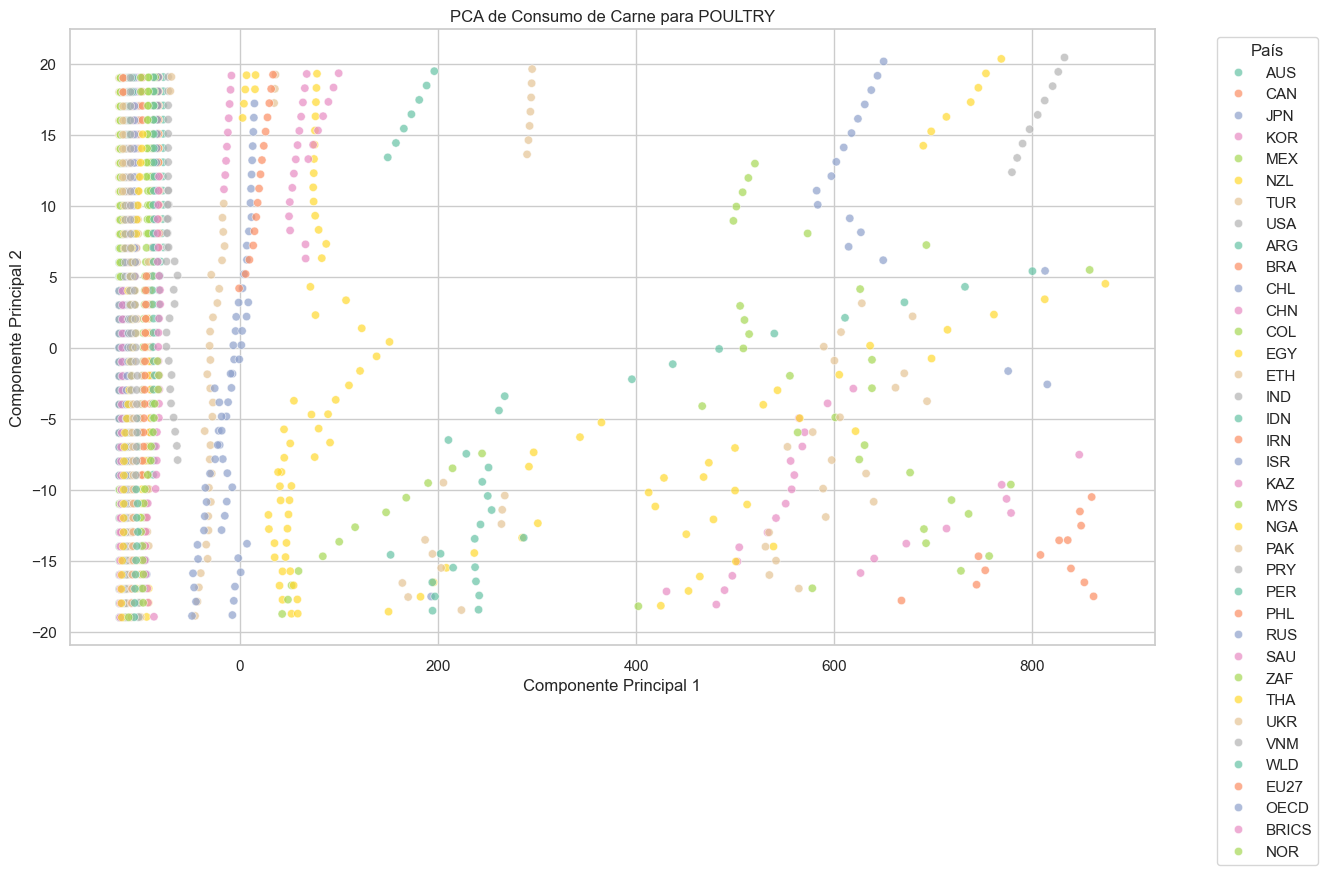

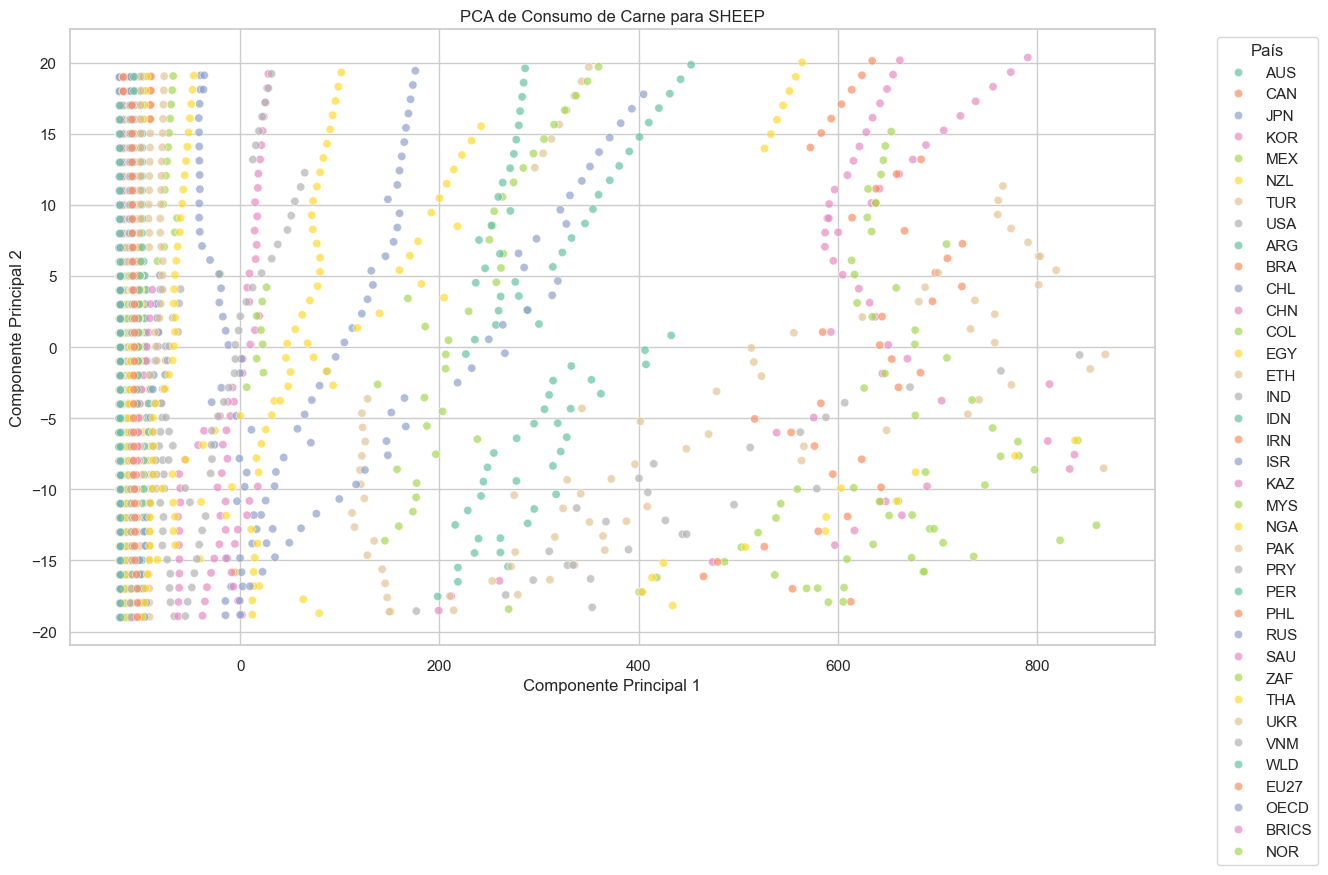

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline

# Cargar y limpiar el dataset
df = pd.read_csv(r"C:\Users\Daniel Bolaños\OneDrive - Universidad Alfonso X el Sabio\UAX\ASIGNATURAS\2º Cuatrimestre 2 Business Intelligence\Data Mining 1\meat_consumption.csv")
df.columns = df.columns.str.strip()
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df_cleaned = df.dropna(subset=['value'])

# Seleccionar solo las columnas numéricas para PCA
numeric_cols = ['time', 'value']
df_numeric = df_cleaned[numeric_cols]

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['subject'] = df_cleaned['subject']
df_pca['location'] = df_cleaned['location']




# Lista de tipos de carne
types_of_meat = df_pca['subject'].unique()

# Crear un gráfico individual para cada tipo de carne
for meat_type in types_of_meat:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='PC1', y='PC2', data=df_pca[df_pca['subject'] == meat_type], hue='location', palette='Set2', alpha=0.7)
    plt.title(f'PCA de Consumo de Carne para {meat_type}')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()





EXPLICACIÓN:

Análisis de los Gráficos de PCA para Cada Tipo de Carne
Los gráficos muestran la distribución de los datos proyectados en los dos primeros componentes principales obtenidos a través de PCA. Vamos a analizar cada uno de ellos:

1. SHEEP
Distribución: La mayoría de los puntos están concentrados en la parte inferior izquierda, pero también hay una dispersión considerable hacia la derecha y hacia arriba.
Variabilidad: La dispersión sugiere que hay una variabilidad significativa en el consumo de carne de oveja entre los diferentes países.
Agrupamiento: No hay un agrupamiento claro de los países, lo que sugiere que el consumo de carne de oveja no sigue un patrón específico por país en los componentes principales.
2. POULTRY
Distribución: Similar al gráfico de oveja, con una alta concentración en la parte inferior izquierda y una dispersión hacia la derecha.
Variabilidad: Hay una variabilidad considerable en el consumo de carne de ave entre los diferentes países.
Agrupamiento: Tampoco hay un agrupamiento claro por países, lo que sugiere que el consumo de carne de ave varía ampliamente sin patrones evidentes en los componentes principales.
3. PIG
Distribución: La distribución de los puntos sigue siendo amplia, pero parece haber una mayor dispersión hacia la derecha.
Variabilidad: La variabilidad en el consumo de carne de cerdo es alta, con muchos puntos dispersos en toda la gráfica.
Agrupamiento: No se observa un agrupamiento claro, indicando que no hay patrones específicos de consumo de carne de cerdo entre los países en los componentes principales.
4. BEEF
Distribución: Similar a los otros gráficos, con una alta concentración en la parte inferior izquierda y una dispersión hacia la derecha.
Variabilidad: La variabilidad en el consumo de carne de res es considerable, con puntos dispersos a lo largo de ambos componentes principales.
Agrupamiento: Al igual que con los otros tipos de carne, no hay un agrupamiento claro, sugiriendo que el consumo de carne de res no sigue un patrón específico entre los países.



Conclusiones Generales
Variabilidad Alta: En todos los gráficos, podemos observar una alta variabilidad en el consumo de carne entre los países.
Falta de Agrupamiento Claro: No hay patrones de agrupamiento evidentes en los componentes principales, lo que sugiere que los factores que afectan el consumo de diferentes tipos de carne son variados y no están claramente diferenciados por país.
Importancia de PCA: Los gráficos de PCA son útiles para reducir la dimensionalidad y visualizar la variabilidad en los datos, pero en este caso, no revelan agrupamientos claros.

LO PODEMOS ACORTAR Y HACER UN ANÁLISIS DE LAS 5 POTENCIAS MUNDIALES O IR HACIENDOLO CADA CONTINENTE O CADA 5 PAÍSES

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_15796\1784768940.py:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=df_pca[df_pca['subject'] == meat_type], hue='location', palette='Set2', alpha=0.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Países presentes después del filtrado: ['AUS' 'CAN' 'MEX' 'NZL' 'CHL']


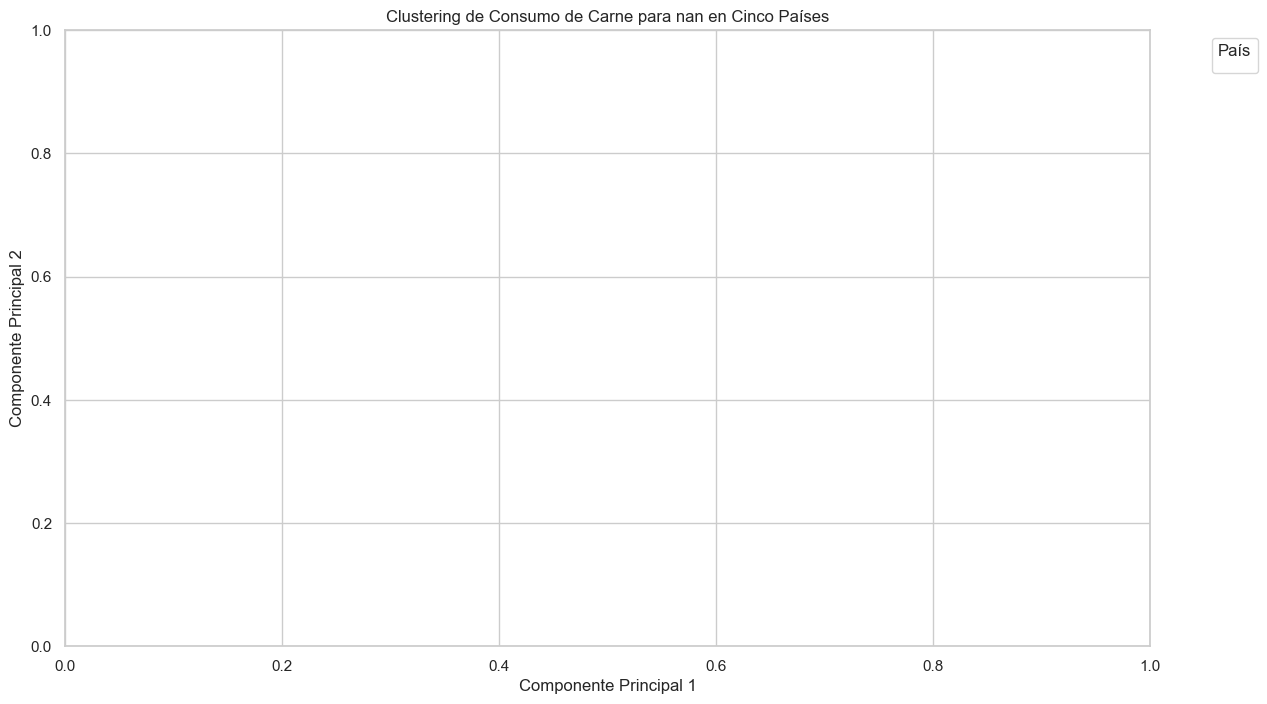

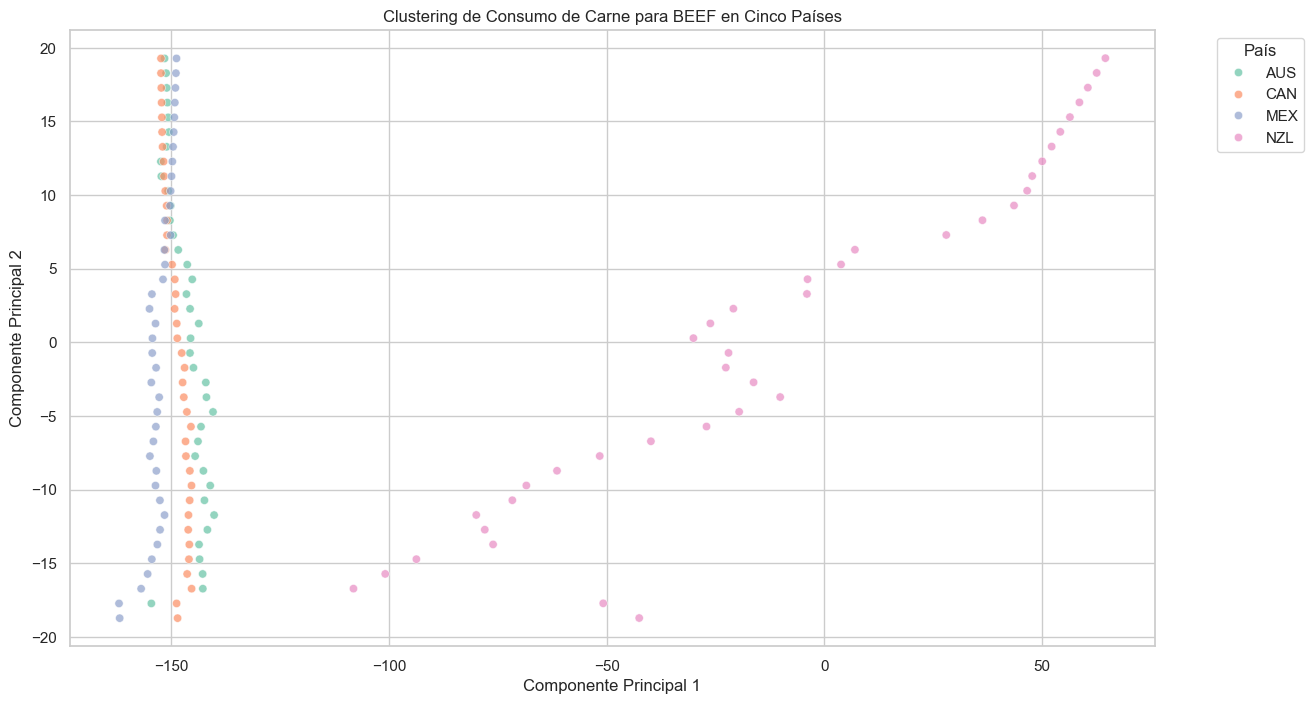

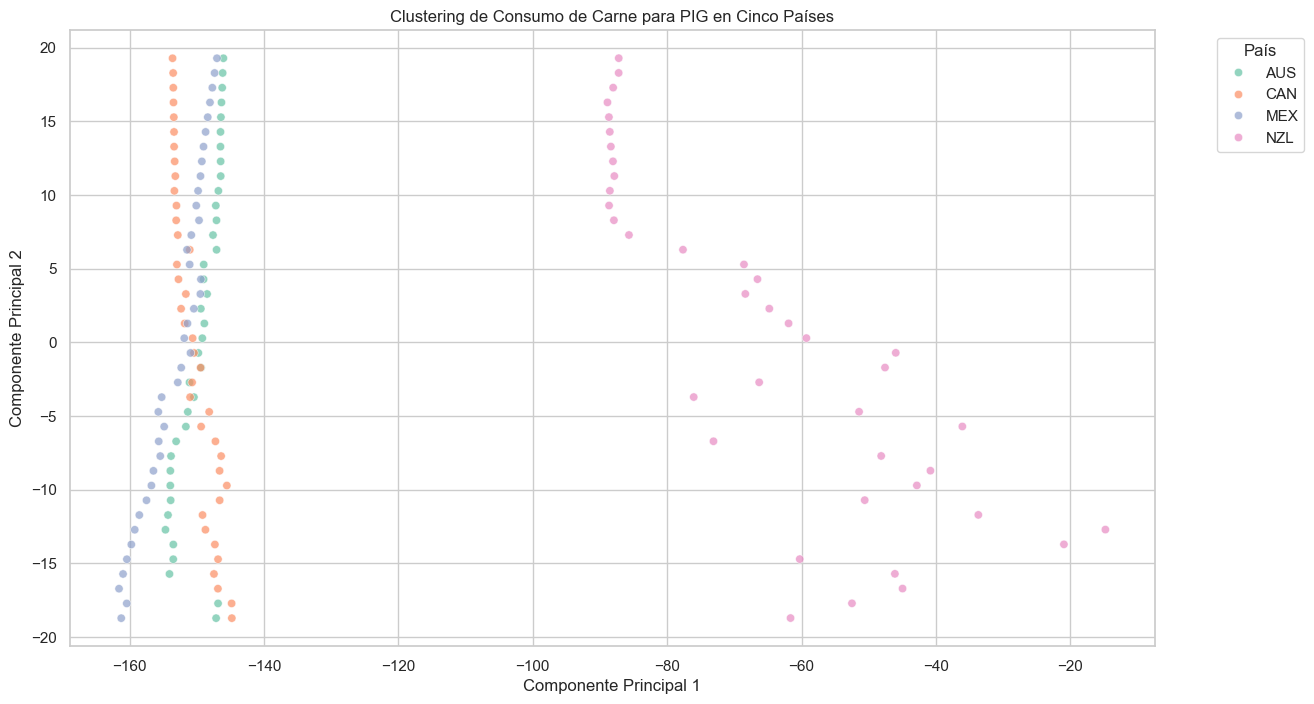

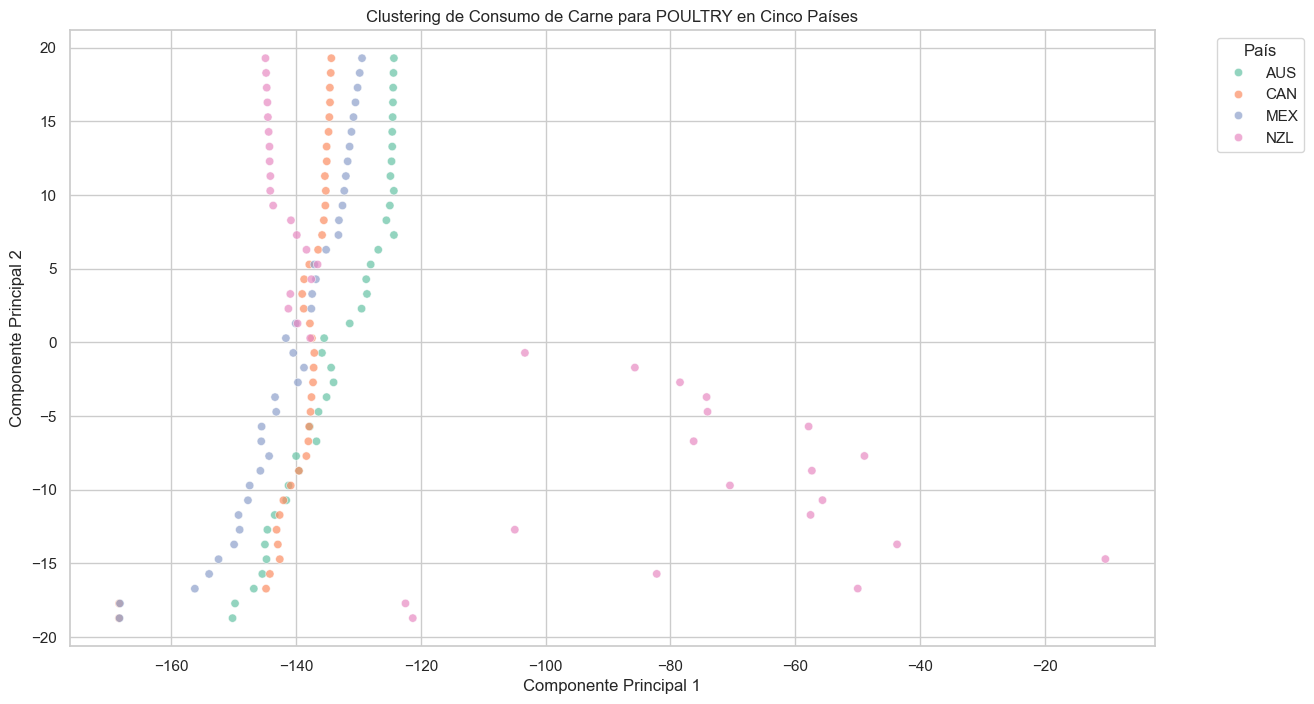

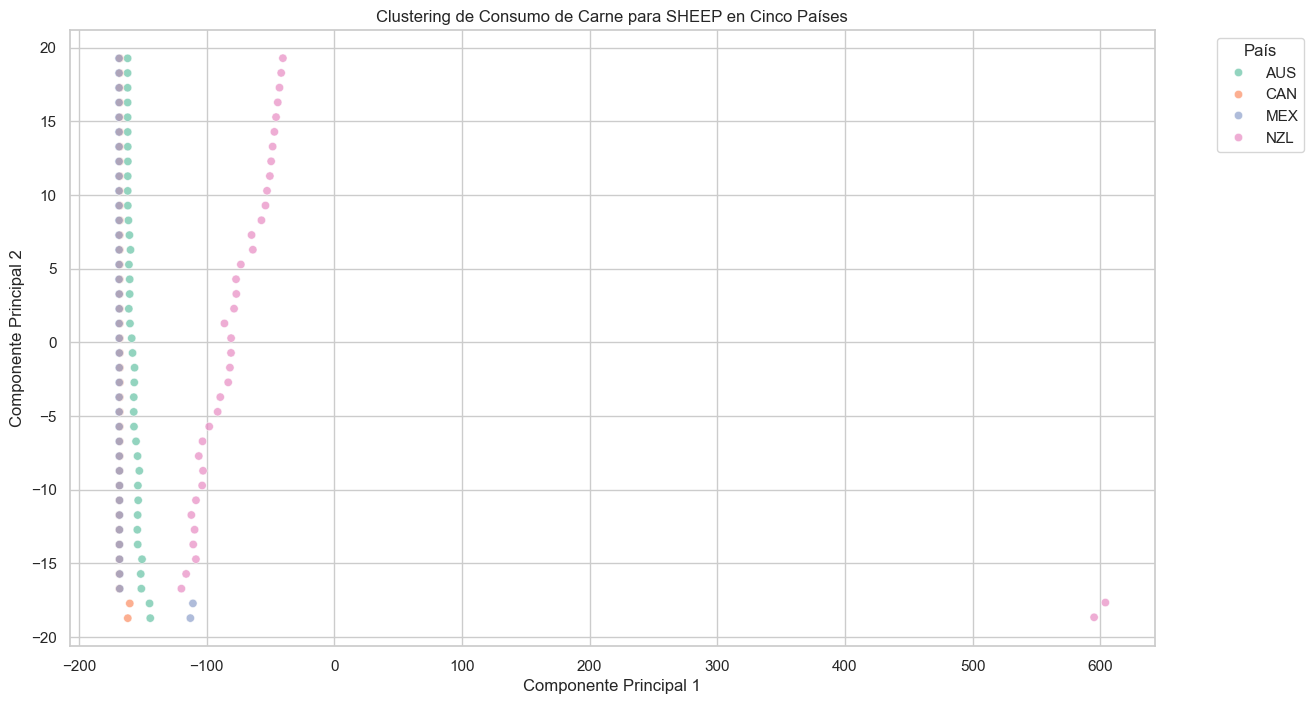

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Configuración para que las visualizaciones aparezcan en el notebook
%matplotlib inline



# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'value' a numérico, forzando errores a NaN para su fácil identificación
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Manejar los valores NaN eliminándolos
df_cleaned = df.dropna(subset=['value'])

# Filtrar los datos para los cinco países mencionados
five_countries = ['AUS', 'CAN', 'MEX', 'NZL', 'CHL']
df_five = df_cleaned[df_cleaned['location'].isin(five_countries)]

# Verificar el filtrado de los países
print("Países presentes después del filtrado:", df_five['location'].unique())

# Seleccionar solo las columnas numéricas para PCA
numeric_cols = ['time', 'value']
df_numeric = df_five[numeric_cols]

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['subject'] = df_five['subject']
df_pca['location'] = df_five['location']

# Lista de tipos de carne
types_of_meat = df_pca['subject'].unique()

# Crear un gráfico individual para cada tipo de carne
for meat_type in types_of_meat:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='PC1', y='PC2', data=df_pca[df_pca['subject'] == meat_type], hue='location', palette='Set2', alpha=0.7)
    plt.title(f'Clustering de Consumo de Carne para {meat_type} en Cinco Países')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
